# Vyhodnocení tlakové zkoušky na betonových krychlích

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [2]:
%matplotlib notebook

### Načtení dat

#### Načtení předem připravených dat

In [3]:
df = pd.read_csv('http://ws-cheetah.stm.fce.vutbr.cz/vyuka/CD004/priklady/tlakova_zkouska/data.txt', 
                 sep=';', header=None)
f_cube_data = df.values.flatten()
f_cube_data

array([ 31.1,  26.1,  33.5,  30.9,  29.7,  31.3,  22.1,  34. ,  34.8,
        41.6,  30.4,  31. ,  31.9,  39.5,  32.8,  28.1,  32.5,  33.6,
        30.7,  35.6,  30.4,  36.5,  32.6,  33.9,  25.2,  37.1,  25.6,
        34.1,  34.6,  29.7,  29.3,  31.7,  34. ,  29.5,  29.5,  32.4,
        32. ,  24.5,  24.2,  29.6,  34.4,  32. ,  31.1,  33.7,  35. ,
        35.5,  33.2,  30.9,  35.8,  38.1,  30.5,  30.8,  36.4,  27.8,
        30.1,  27.4,  34.1,  26.7,  24.1,  34.6,  33.7,  32.6,  31.8,
        25.8,  35.1,  30. ,  33.6,  36.4,  34.3,  32.1,  32.3,  26.9,
        24.9,  28.1,  33.8,  30.8,  35.3,  29.7,  32.7,  31.2,  30.1,
        32.6,  36.4,  31.4,  33.8,  37. ,  38.9,  29.6,  30.1,  29.7,
        28.6,  38.5,  28.7,  25.6,  31.8,  26.7,  29.2,  36.6,  37. ,  27.3])

####  Načtení z dat křivek

In [4]:
f_cube = []
for i in range(100):
    f = pd.read_csv('http://ws-cheetah.stm.fce.vutbr.cz/vyuka/CD004/priklady/tlakova_zkouska/ld_curves/krivka_{:02d}.txt'.format(i),
                    sep=';', header=None, usecols=(1,), skiprows=2)
    f_cube.append(f.values.max())
f_cube = np.array(f_cube)
f_cube

array([ 31.1,  26.1,  33.5,  30.9,  29.7,  31.3,  22.1,  34. ,  34.8,
        41.6,  30.4,  31. ,  31.9,  39.5,  32.8,  28.1,  32.5,  33.6,
        30.7,  35.6,  30.4,  36.5,  32.6,  33.9,  25.2,  37.1,  25.6,
        34.1,  34.6,  29.7,  29.3,  31.7,  34. ,  29.5,  29.5,  32.4,
        32. ,  24.5,  24.2,  29.6,  34.4,  32. ,  31.1,  33.7,  35. ,
        35.5,  33.2,  30.9,  35.8,  38.1,  30.5,  30.8,  36.4,  27.8,
        30.1,  27.4,  34.1,  26.7,  24.1,  34.6,  33.7,  32.6,  31.8,
        25.8,  35.1,  30. ,  33.6,  36.4,  34.3,  32.1,  32.3,  26.9,
        24.9,  28.1,  33.8,  30.8,  35.3,  29.7,  32.7,  31.2,  30.1,
        32.6,  36.4,  31.4,  33.8,  37. ,  38.9,  29.6,  30.1,  29.7,
        28.6,  38.5,  28.7,  25.6,  31.8,  26.7,  29.2,  36.6,  37. ,  27.3])

### Stanovení charakteristik souboru naměřených hodnot 

In [5]:
width = 8
print('{:>{width}} = {: d}'.format('n', len(f_cube), width=width))
print('{:>{width}} = {: .1f}'.format('min', f_cube.min(), width=width))
print('{:>{width}} = {: .1f}'.format('max', f_cube.max(), width=width))
print('{:>{width}} = {: .3f}'.format('mu', f_cube.mean(), width=width))
print('{:>{width}} = {: .3f}'.format('std', f_cube.std(ddof=1), width=width))
print('{:>{width}} = {: .6f}'.format('skew', stats.skew(f_cube, bias=False), width=width))
print('{:>{width}} = {: .6f}'.format('kurtosis', stats.kurtosis(f_cube), width=width))
print('{:>{width}} = {: .2f} %'.format('CoV', f_cube.std() / f_cube.mean() * 100, width=width))

       n =  100
     min =  22.1
     max =  41.6
      mu =  31.705
     std =  3.770
    skew = -0.094538
kurtosis = -0.140057
     CoV =  11.83 %


### Aproximace pomocí známých hustot pravděpodobnosti

In [6]:
params = stats.norm.fit(f_cube)
rv_norm = stats.norm(*params)
print('params =', params)
print('mu, std =', rv_norm.mean(), rv_norm.std())

params = (31.704999999999998, 3.7511698175369244)
mu, std = 31.705 3.75116981754


In [7]:
params = stats.lognorm.fit(f_cube, floc=0)
rv_lognorm = stats.lognorm(*params)
print('params =', params)
print('mu, std =', rv_lognorm.mean(), rv_lognorm.std())

params = (0.12102438426273147, 0, 31.477597452733875)
mu, std = 31.7089682711 3.85165341894


In [8]:
params = stats.weibull_min.fit(f_cube, floc=0)
rv_weib = stats.weibull_min(*params)
print('params =', params)
print('mu, std =', rv_weib.mean(), rv_weib.std())

params = (9.229216368943419, 0, 33.360869543028542)
mu, std = 31.6273417452 4.10390509008


### Grafické zobrazení hustot

<IPython.core.display.Javascript object>


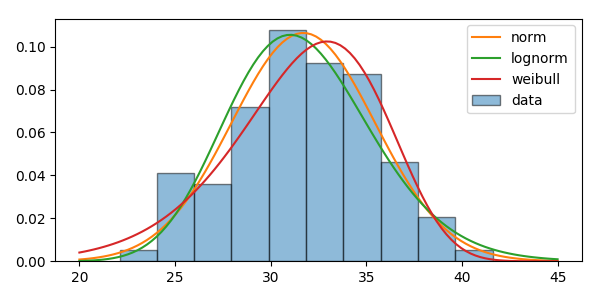

In [9]:
fig, ax = plt.subplots(figsize=(6,3), tight_layout=True)
ax.hist(f_cube, bins='sqrt', ec='k', normed=True, label='data', alpha=.5)

x = np.linspace(20, 45, 100)
ax.plot(x, rv_norm.pdf(x), label='norm')

ax.plot(x, rv_lognorm.pdf(x), label='lognorm')

ax.plot(x, rv_weib.pdf(x), label='weibull')

ax.legend();

### Grafické zobrazení distribučních funkcí

<IPython.core.display.Javascript object>


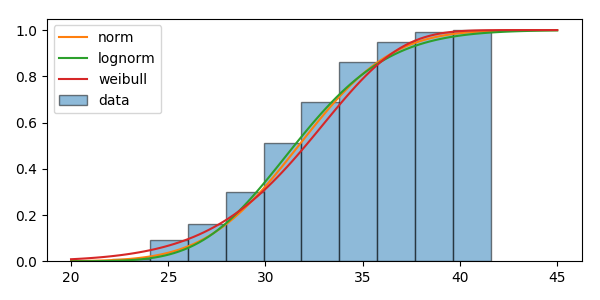

In [10]:
fig, ax = plt.subplots(figsize=(6,3), tight_layout=True)
ax.hist(f_cube, bins='sqrt', ec='k', normed=True, label='data', 
        alpha=.5, cumulative=True)

x = np.linspace(20, 45, 100)
ax.plot(x, rv_norm.cdf(x), label='norm')

ax.plot(x, rv_lognorm.cdf(x), label='lognorm')

ax.plot(x, rv_weib.cdf(x), label='weibull')

ax.legend();

### Výpočet kvantilů

In [11]:
def print_quantils(rv, name):
    print(name)
    print('\tf_0.05  =', rv.ppf(0.05))
    print('\tf_0.95  =', rv.ppf(0.95))
    print('\tf_0.001 =', rv.ppf(0.001))
print_quantils(rv_norm, 'rv_norm')
print_quantils(rv_lognorm, 'rv_lognorm')
print_quantils(rv_weib, 'rv_weib')

rv_norm
	f_0.05  = 25.5348747203
	f_0.95  = 37.8751252797
	f_0.001 = 20.1130138439
rv_lognorm
	f_0.05  = 25.7957230114
	f_0.95  = 38.4109854552
	f_0.001 = 21.656001872
rv_weib
	f_0.05  = 24.1807860034
	f_0.95  = 37.5722501856
	f_0.001 = 15.7836054845
